In [58]:
import xmlrpc.client as xml
import matplotlib.pyplot as plt
import numpy as np

In [59]:
model = 'simulation_modif'
file_type = '.plecs'
plecs = xml.Server('http://localhost:1080/RPC2').plecs

In [60]:
plt.style.use('seaborn-v0_8-deep')

In [61]:
values = plecs.simulate(model)['Values']
time = plecs.simulate(model)['Time']

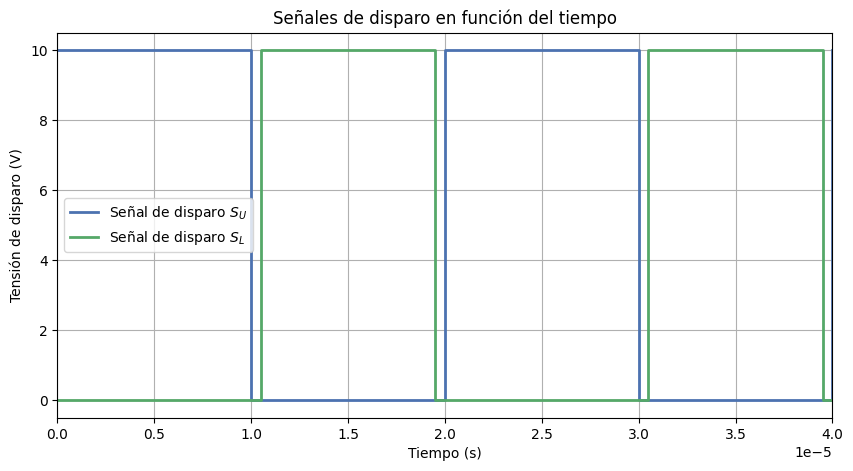

In [8]:
plt.figure(figsize=(10,5))
plt.plot(time,values[2],linewidth=2, label='Señal de disparo $S_U$')
plt.plot(time,values[3],linewidth=2, label='Señal de disparo $S_L$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Tensión de disparo (V)')
plt.title('Señales de disparo en función del tiempo')
plt.legend()
plt.xlim(0,0.00004)
plt.grid(True)
plt.savefig('disparo.pdf')

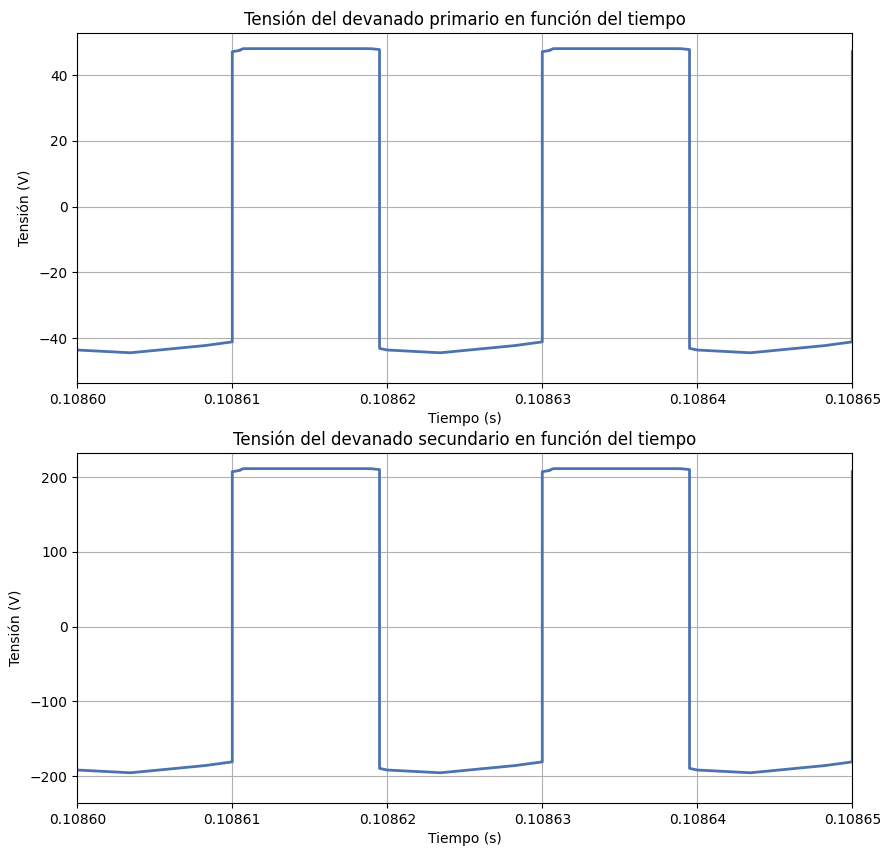

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[4],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('Tensión del devanado primario en función del tiempo')
plt.grid(True)
plt.xlim(1.0860e-1,1.0865e-1)
plt.subplot(2,1,2)
plt.plot(time,values[6],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('Tensión del devanado secundario en función del tiempo')
plt.grid(True)
plt.xlim(1.0860e-1,1.0865e-1)
plt.savefig('tensiones_transformador.pdf')

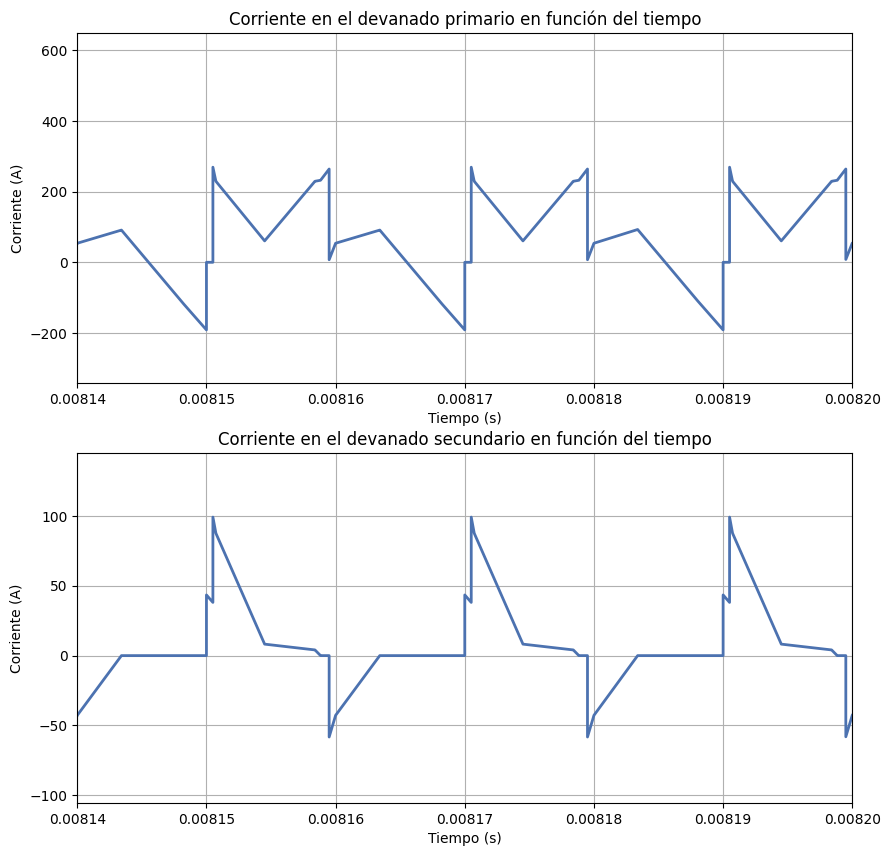

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[5],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('Corriente en el devanado primario en función del tiempo')
plt.grid(True)
plt.xlim(8.14e-3,8.2e-3)
plt.subplot(2,1,2)
plt.plot(time,values[7],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('Corriente en el devanado secundario en función del tiempo')
plt.grid(True)
plt.xlim(8.14e-3,8.2e-3)
plt.savefig('corrientes_transformador.pdf')

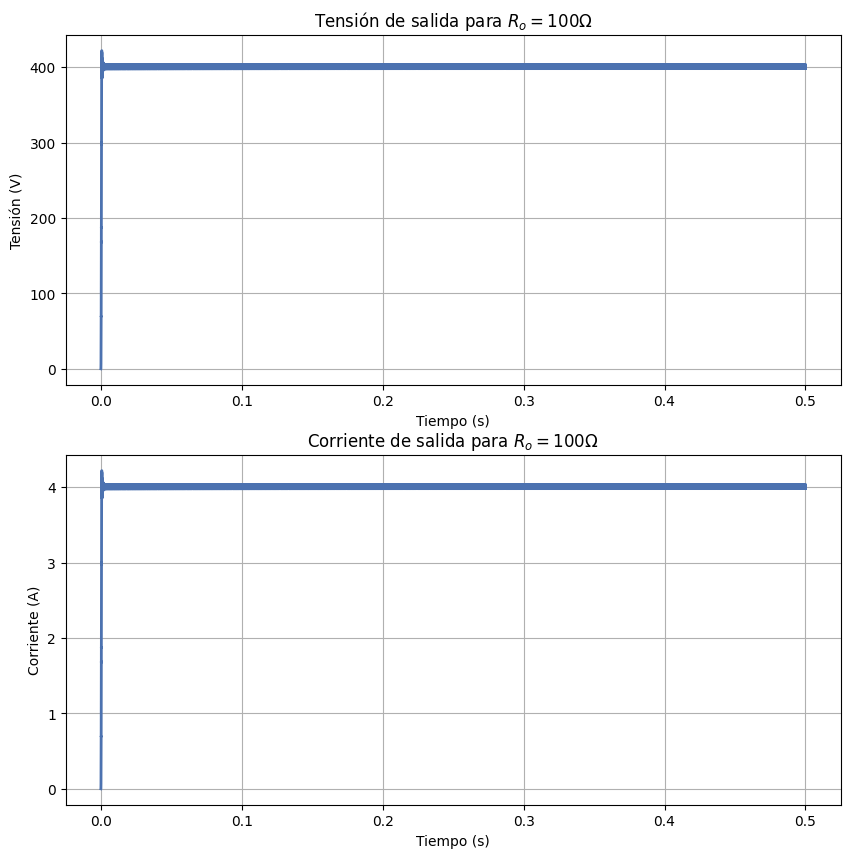

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[0],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('Tensión de salida para $R_o=100\Omega$')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(time,values[1],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('Corriente de salida para $R_o=100\Omega$')
plt.grid(True)
plt.savefig('informe/informe_TFI/img/salida_100.pdf')

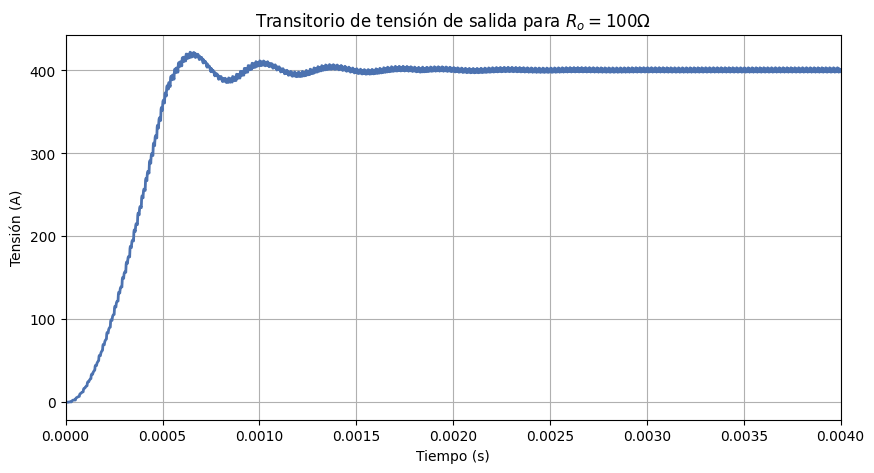

In [16]:
plt.figure(figsize=(10,5))
plt.plot(time,values[0],linewidth=2)
plt.ylabel('Tensión (A)')
plt.xlabel('Tiempo (s)')
plt.title('Transitorio de tensión de salida para $R_o=100\Omega$')
plt.grid(True)
plt.xlim(0,4e-3)
plt.savefig('informe/informe_TFI/img/transitorio.pdf')

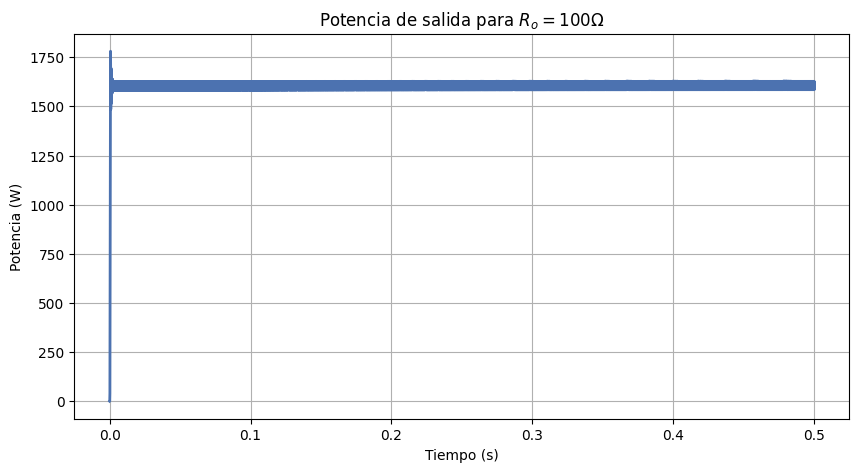

In [27]:
tension = np.array(values[0])
corriente = np.array(values[1])
plt.figure(figsize=(10,5))
plt.plot(time,tension*corriente,linewidth=2)
plt.ylabel('Potencia (W)')
plt.xlabel('Tiempo (s)')
plt.title('Potencia de salida para $R_o=100\Omega$')
plt.grid(True)
plt.savefig('informe/informe_TFI/img/potencia.pdf')

In [19]:
values_array = np.array(values[0])
indice_40V = np.where(values_array > 40)[0][0]
valor_90_por_ciento = 0.9 * 400
for i in range(indice_40V, len(values_array)):
    if all(values_array[i:] >= valor_90_por_ciento):
        indice_90_por_ciento = i
        break
tiempo_establecimiento = time[indice_90_por_ciento] - time[indice_40V]
print(f"El tiempo de establecimiento es {tiempo_establecimiento} segundos.")

El tiempo de establecimiento es 0.0003499731141804132 segundos.


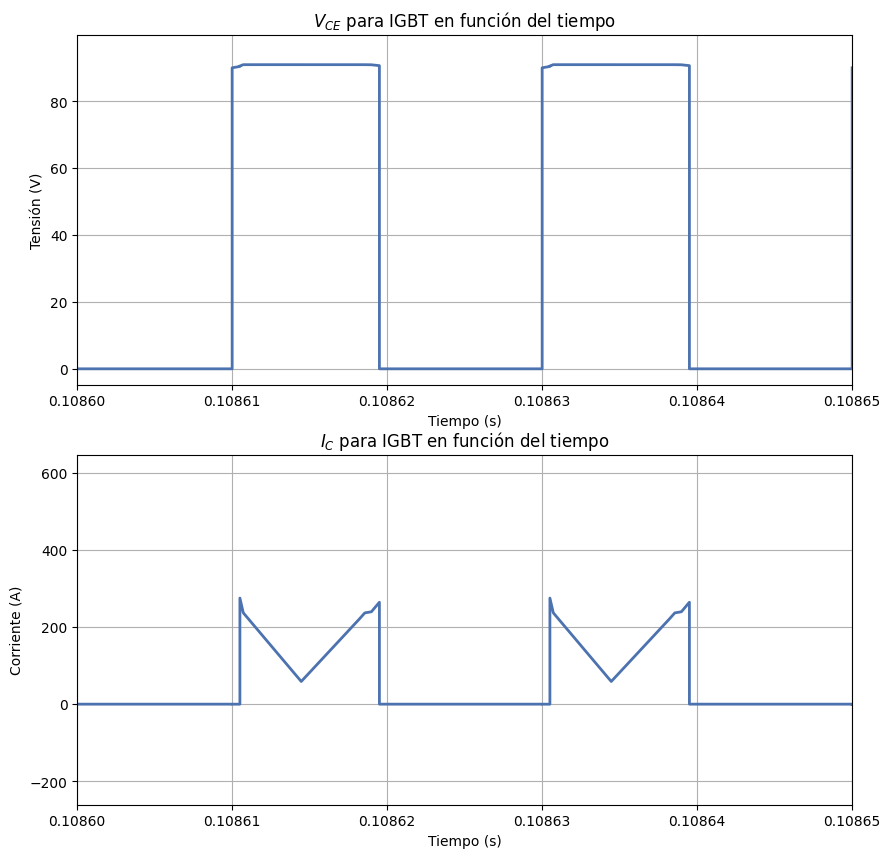

In [63]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[10],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('$V_{CE}$ para IGBT en función del tiempo')
plt.grid(True)
plt.xlim(1.0860e-1,1.0865e-1)
plt.subplot(2,1,2)
plt.plot(time,values[8],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('$I_{C}$ para IGBT en función del tiempo')
plt.grid(True)
plt.xlim(1.0860e-1,1.0865e-1)
plt.savefig('informe/informe_TFI/img/signal_IGBT.pdf')

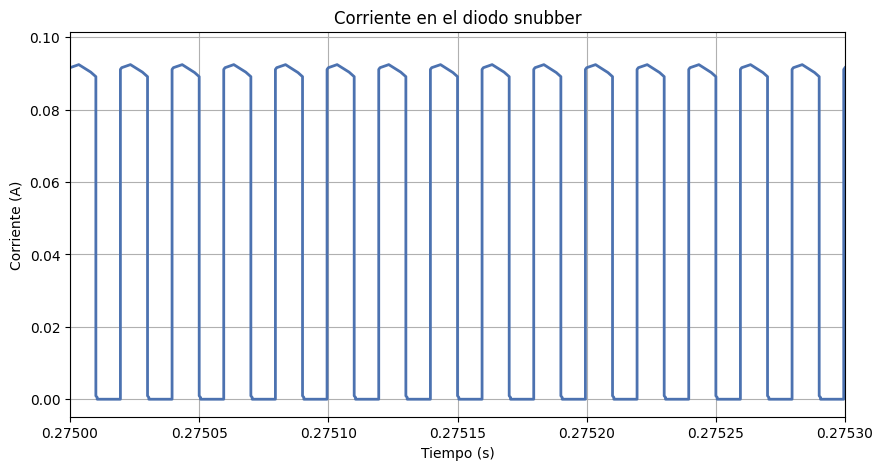

In [29]:
plt.figure(figsize=(10,5))
plt.plot(time,values[11],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('Corriente en el diodo snubber')
plt.grid(True)
plt.xlim(2.75e-1,2.753e-1)
plt.savefig('informe/informe_TFI/img/diodo_snubber.pdf')

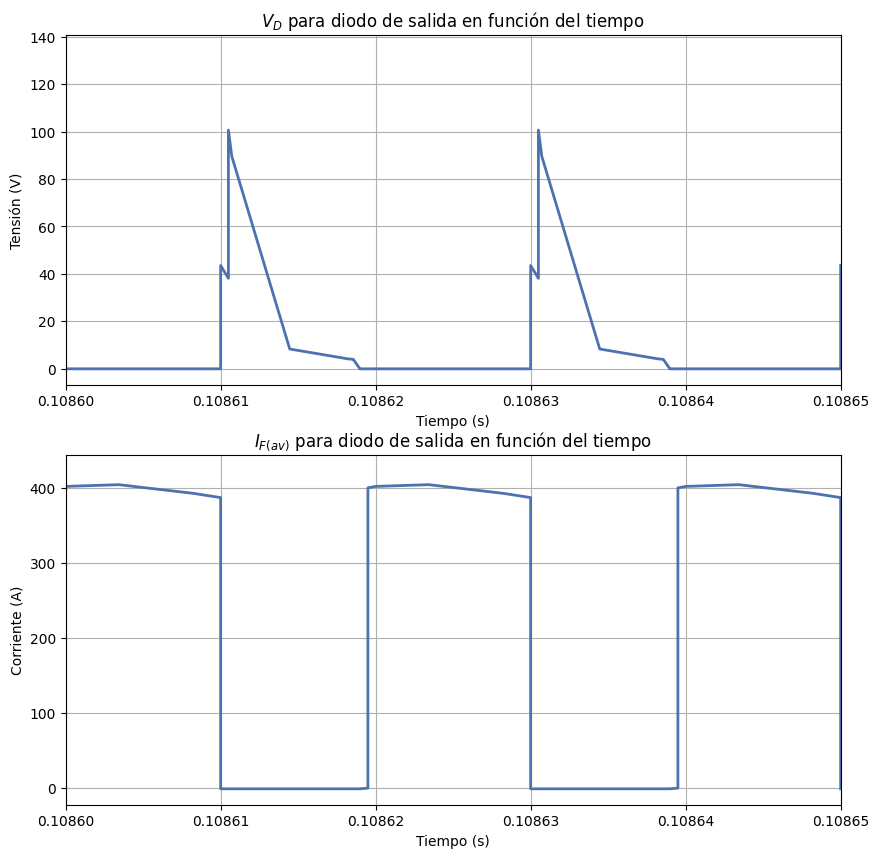

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,values[13],linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Tiempo (s)')
plt.title('$V_{D}$ para diodo de salida en función del tiempo')
plt.grid(True)
plt.xlim(1.0860e-1,1.0865e-1)
plt.subplot(2,1,2)
plt.plot(time,values[12],linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Tiempo (s)')
plt.title('$I_{F(av)}$ para diodo de salida en función del tiempo')
plt.grid(True)
plt.xlim(1.0860e-1,1.0865e-1)
plt.savefig('informe/informe_TFI/img/diodo_salida.pdf')

In [40]:
resistance = np.linspace(100,50000,100)
v_mean = []
i_mean = []

In [38]:
import time as t

In [41]:
for r in resistance:
    plecs.set(model+'/Ro','R',str(r))
    values = plecs.simulate(model)['Values']
    half = len(values[0])//2
    half_values = values[0][half:]
    v_mean.append(np.mean(half_values))
    i_mean.append(np.mean(values[1][half:]))
    t.sleep(1e-3)

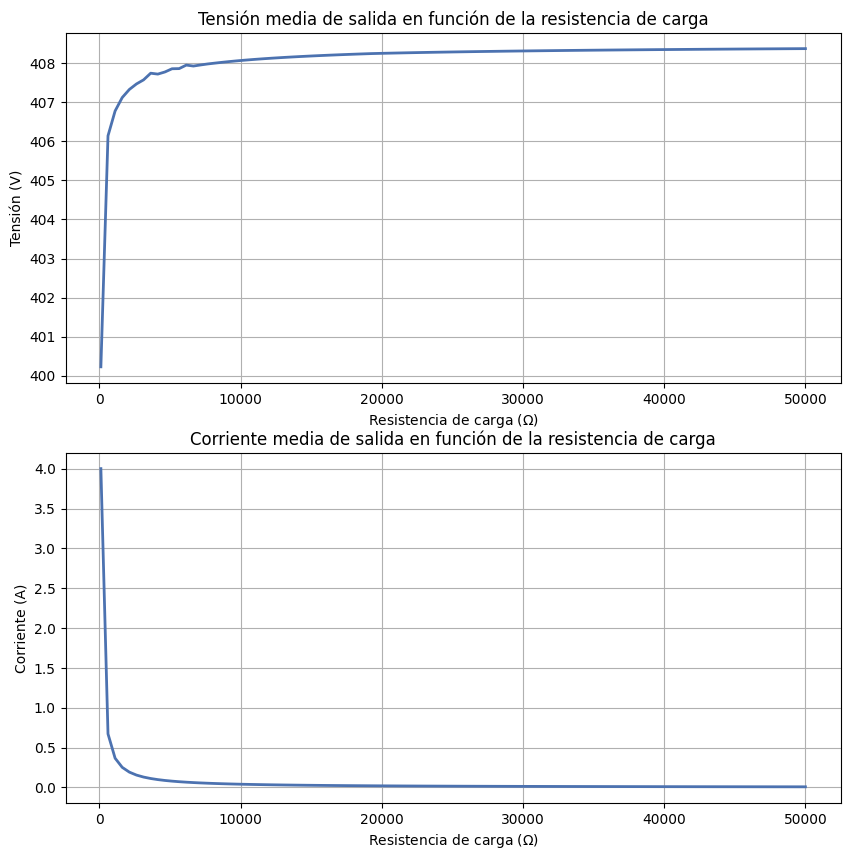

In [43]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(resistance,v_mean,linewidth=2)
plt.ylabel('Tensión (V)')
plt.xlabel('Resistencia de carga ($\Omega$)')
plt.title('Tensión media de salida en función de la resistencia de carga')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(resistance,i_mean,linewidth=2)
plt.ylabel('Corriente (A)')
plt.xlabel('Resistencia de carga ($\Omega$)')
plt.title('Corriente media de salida en función de la resistencia de carga')
plt.grid(True)
plt.savefig('informe/informe_TFI/img/salida_regulacion.pdf')

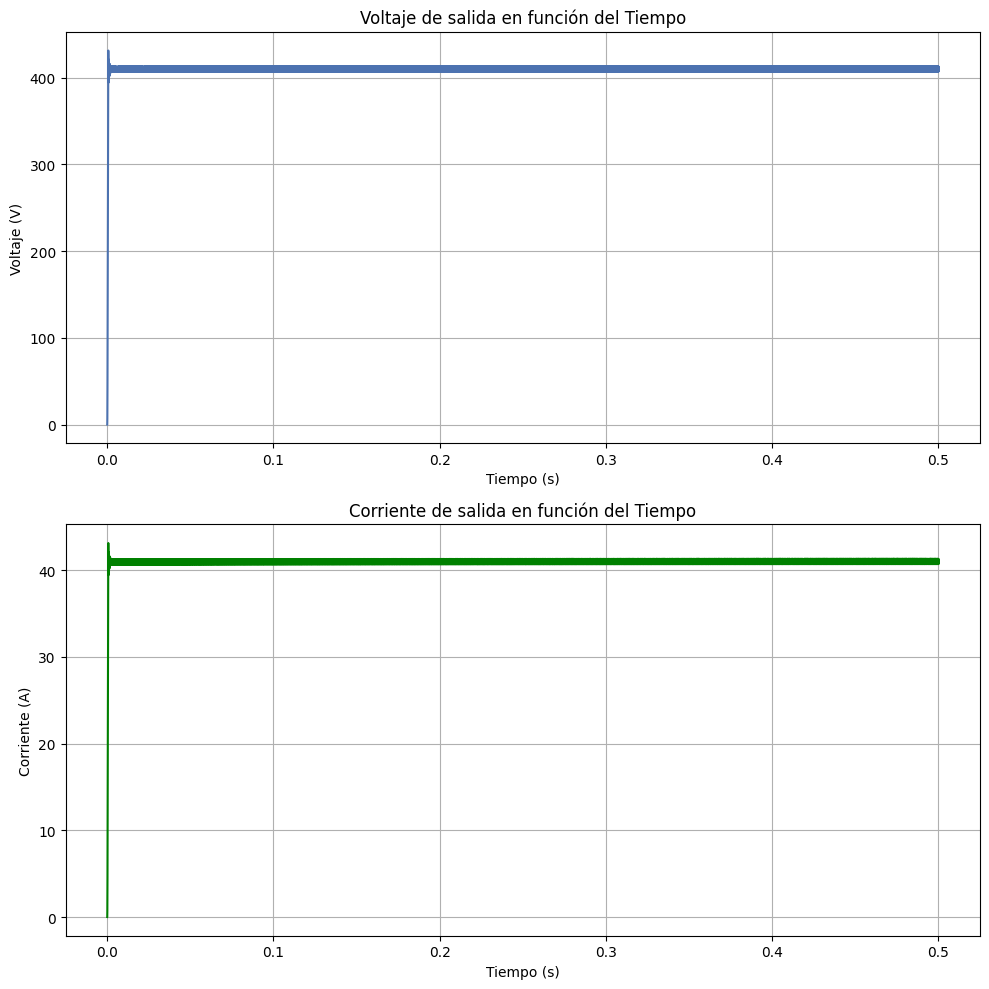

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')

# Paso 1: Leer el archivo CSV
# Asegúrate de reemplazar 'tu_archivo.csv' con la ruta real de tu archivo CSV
df = pd.read_csv('data_full.csv')

# Paso 2: Extraer las columnas necesarias
time = df["Time / s"]
voltage = df["Vo:Measured voltage"]
current = df["Io:Measured current"]

# Paso 3: Usar matplotlib para crear los subplots
plt.figure(figsize=(10, 10))

# Subplot para el voltaje medido
plt.subplot(2, 1, 1)
plt.plot(time, voltage, label='Voltaje Medido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje de salida en función del Tiempo')
plt.grid(True)

# Subplot para la corriente medida
plt.subplot(2, 1, 2)
plt.plot(time, current, label='Corriente Medida', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.title('Corriente de salida en función del Tiempo')
plt.grid(True)

plt.tight_layout()
plt.savefig('informe/informe_TFI/img/salida_completa.pdf')
plt.show()

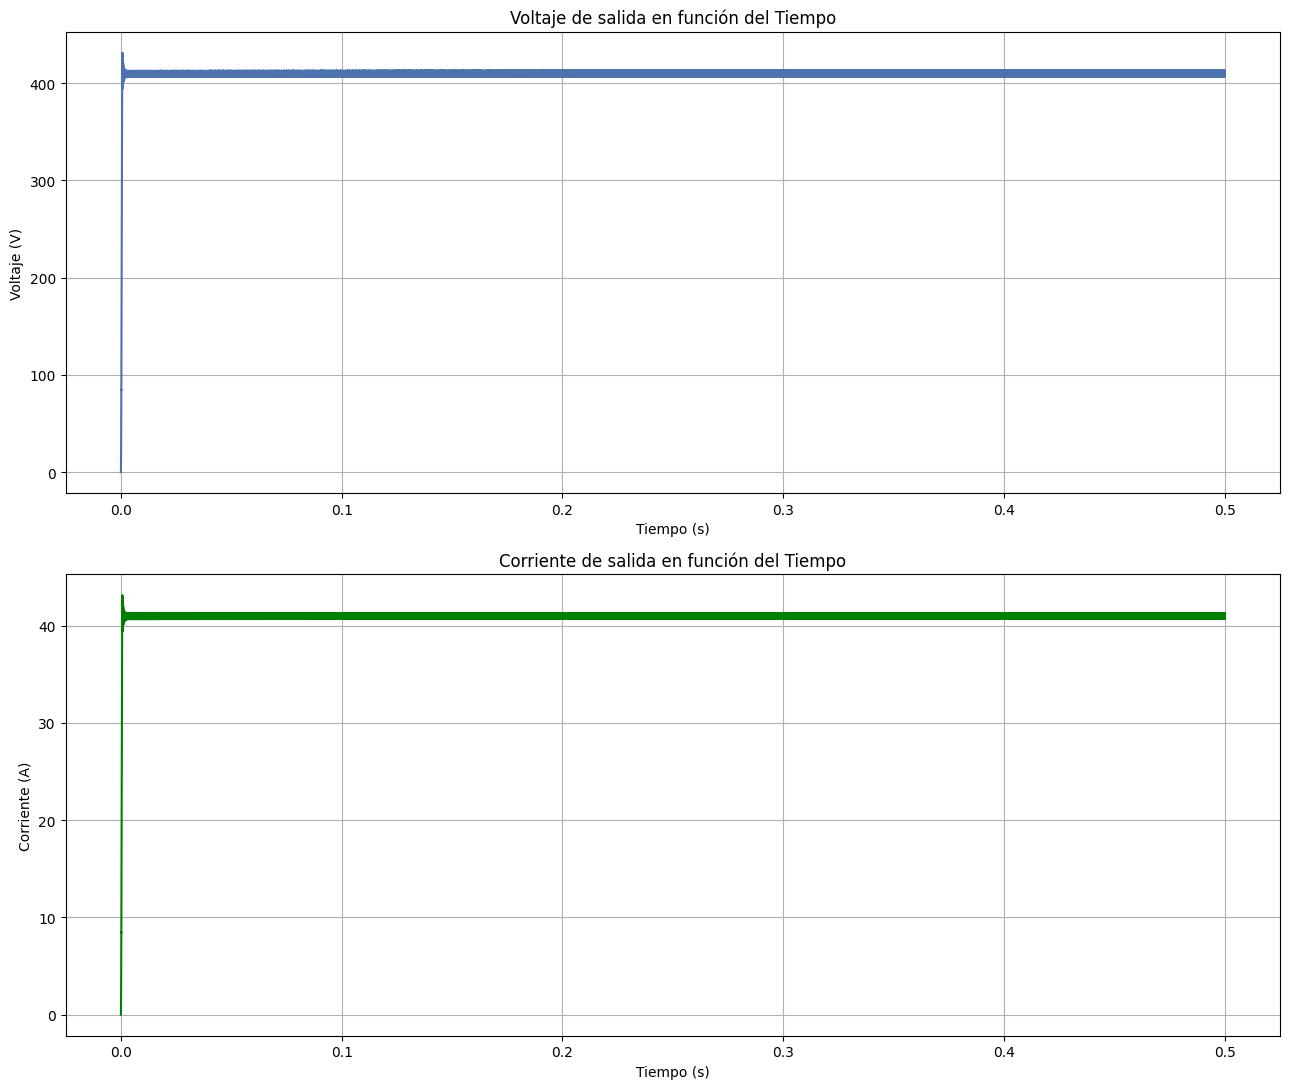

In [56]:

plt.figure(figsize=(13, 11))

# Subplot para el voltaje medido
plt.subplot(2, 1, 1)
plt.plot(time, voltage, label='Voltaje Medido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje de salida en función del Tiempo')
plt.grid(True)

# Subplot para la corriente medida
plt.subplot(2, 1, 2)
plt.plot(time, current, label='Corriente Medida', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.title('Corriente de salida en función del Tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()

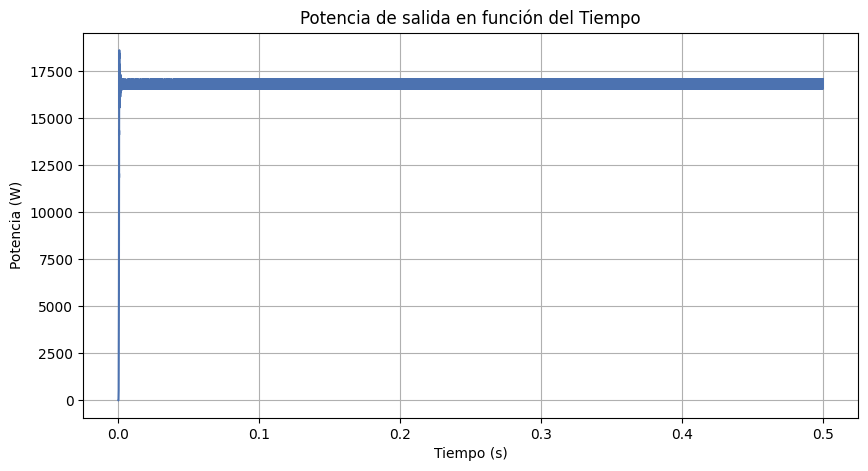

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(time, voltage*current, label='Voltaje Medido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencia (W)')
plt.title('Potencia de salida en función del Tiempo')
plt.grid(True)
plt.savefig('informe/informe_TFI/img/potencia_completa.pdf')